# Trabajo Integrador Parte 4

Nombre: Noelia Qualindi

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi

In [3]:
my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

In [4]:
DATASET_PATH = "./data/heart_disease/"

In [5]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [6]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [7]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [8]:
my_data[target].value_counts()

num
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [9]:
y = my_data[target].values

In [10]:
sano_mask = y == 0
enfermo_mask = y > 0

In [11]:
y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

In [12]:
y_class

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [13]:
pd.get_dummies(my_data[categorical_features])

,sex,cp,fbs,restecg,exang,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,1.0,4.0,0.0,2.0,1.0,2.0,False,False,False,True,False,True,False,False,False
1,1.0,4.0,0.0,2.0,1.0,2.0,False,False,True,False,False,False,False,True,False
2,1.0,3.0,0.0,0.0,0.0,3.0,True,False,False,False,False,True,False,False,False
3,0.0,2.0,0.0,2.0,0.0,1.0,True,False,False,False,False,True,False,False,False
4,1.0,2.0,0.0,0.0,0.0,1.0,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,1.0,0.0,0.0,0.0,2.0,True,False,False,False,False,False,False,True,False
298,1.0,4.0,1.0,0.0,0.0,2.0,False,False,True,False,False,False,False,True,False
299,1.0,4.0,0.0,0.0,1.0,2.0,False,True,False,False,False,False,False,True,False
300,0.0,2.0,0.0,2.0,0.0,2.0,False,True,False,False,False,True,False,False,False


<Axes: >

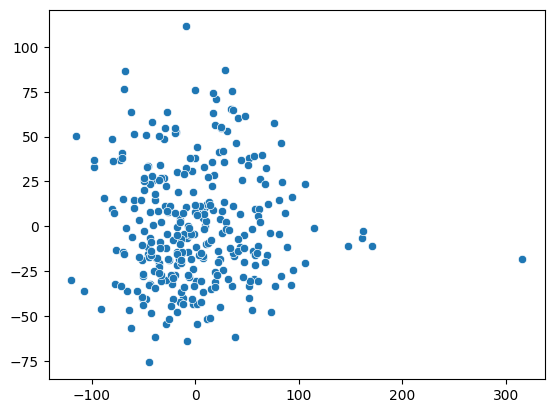

In [14]:
pca = PCA(n_components=0.9).fit(my_data[numerical_features])

pca.n_components_
X_transformed = pca.transform(my_data[numerical_features])
X_transformed

sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1])

### Resolución

      age  trestbps   chol  thalach  oldpeak  num  sex_0.0  sex_1.0  cp_1.0  \
0    67.0     160.0  286.0    108.0      1.5    2    False     True   False   
1    67.0     120.0  229.0    129.0      2.6    1    False     True   False   
2    37.0     130.0  250.0    187.0      3.5    0    False     True   False   
3    41.0     130.0  204.0    172.0      1.4    0     True    False   False   
4    56.0     120.0  236.0    178.0      0.8    0    False     True   False   
..    ...       ...    ...      ...      ...  ...      ...      ...     ...   
297  45.0     110.0  264.0    132.0      1.2    1    False     True    True   
298  68.0     144.0  193.0    141.0      3.4    2    False     True   False   
299  57.0     130.0  131.0    115.0      1.2    3    False     True   False   
300  57.0     130.0  236.0    174.0      0.0    1     True    False   False   
301  38.0     138.0  175.0    173.0      0.0    0    False     True   False   

     cp_2.0  ...  slope_3.0  ca_0.0  ca_1.0  ca_2.0

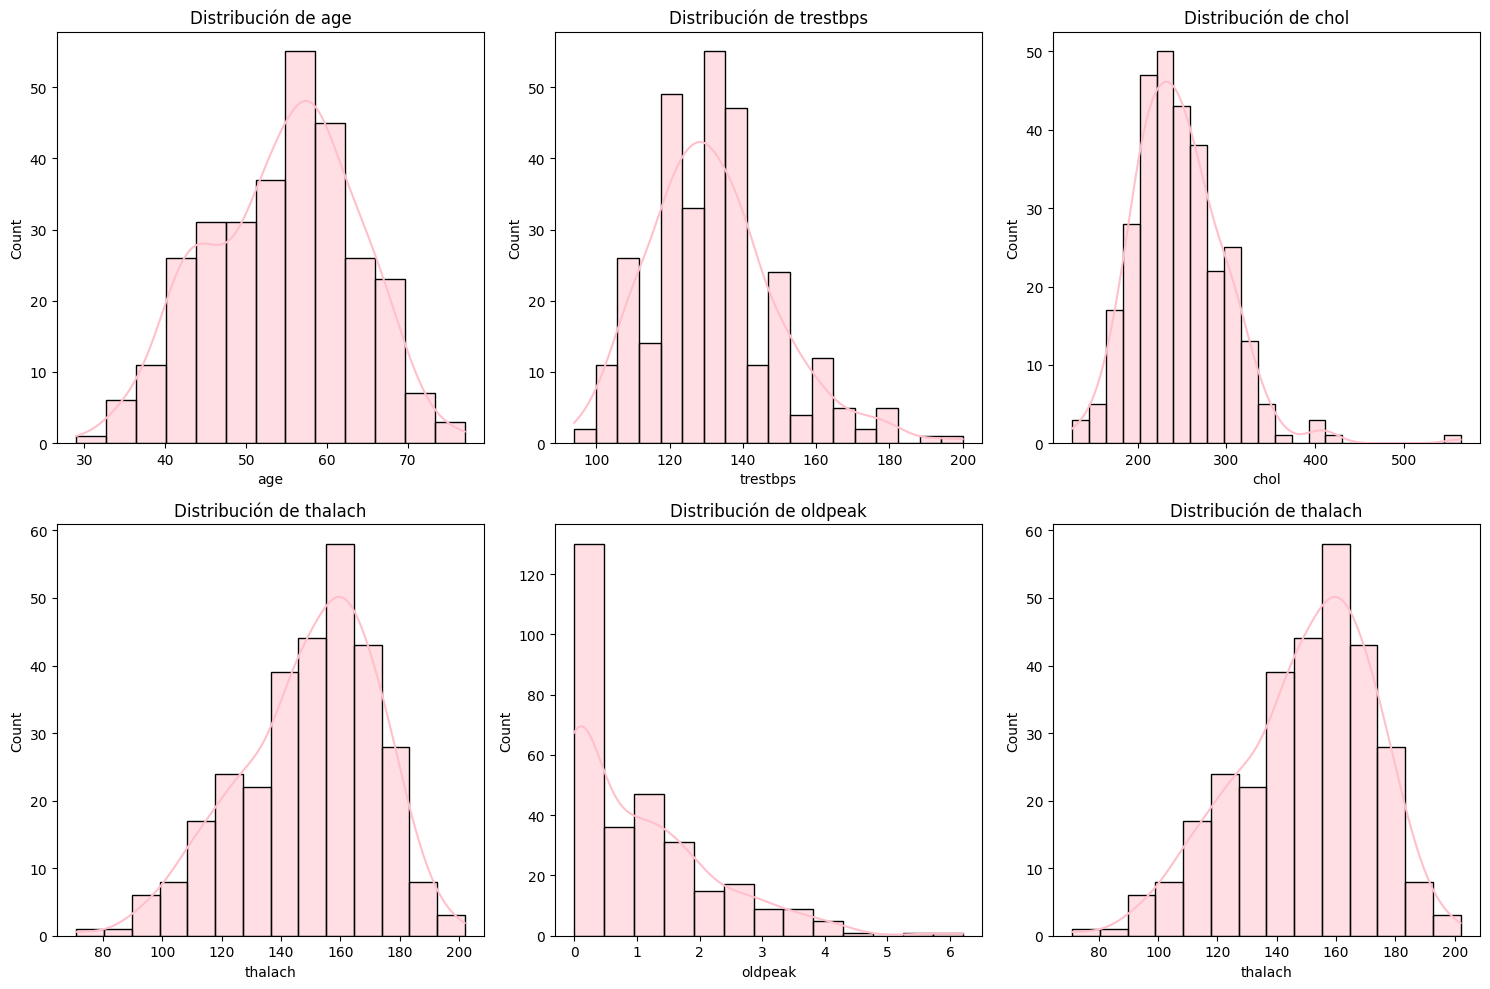

In [15]:
my_data_encoded = pd.get_dummies(my_data, columns=categorical_features)
print(my_data_encoded)
my_data_encoded[target] = y_class

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(my_data_encoded[col], kde=True, color='pink')
    plt.title(f'Distribución de {col}')
plt.tight_layout()


#### Observaciones 
En cuanto a los resultados electrocardiográficos en reposo (restecg), se observa que la categoría 0 es la más constante.
Existe una prevalencia superior de individuos del género masculino en comparación con su contraparte femenina.
En lo que respecta al tipo de dolor de pecho (cp), se destaca que el tipo 4 es el más frecuente, mientras que el tipo 1 es menos común.

Dentro del conjunto de datos, se identifican algunos valores atípicos en ciertas variables como la presión arterial en reposo (trestbps) y el colesterol sérico (chol). No obstante, la cantidad de estos valores atípicos no es lo suficientemente significativa como para requerir su eliminación o imputación. Evaluaremos esta situación más detalladamente al modelar y ajustar los modelos correspondientes.

In [16]:
# Escalar los datos

scaler = StandardScaler()
my_data_encoded_scaled = my_data_encoded.copy()
my_data_encoded_scaled[numerical_features] = scaler.fit_transform(my_data_encoded[numerical_features])

pca = PCA(n_components=0.9).fit(my_data_encoded_scaled[numerical_features])
X_numerical_transformed = pca.transform(my_data_encoded_scaled[numerical_features])

print(X_numerical_transformed)
my_data_encoded_final = my_data_encoded.drop(columns=numerical_features + ["num"])
X_final = pd.concat(
    [
        pd.DataFrame(X_numerical_transformed, index=my_data_encoded.index),
        my_data_encoded_final.reset_index(drop=True),
    ],
    axis=1,
)
X_final.columns = X_final.columns.astype(str)


[[ 3.15409285  0.95965024  0.09512102 -0.72030616]
 [ 1.94535529 -0.4875163  -0.11144358  0.39151751]
 [-1.95567972  0.3871623  -1.60912046  2.65270441]
 ...
 [ 1.73005278 -2.07057024 -1.0953455  -1.09674111]
 [-1.47685091  0.43206428  0.13106826 -0.69319328]
 [-2.29427412 -0.73946905 -1.18515094 -0.46857808]]


# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [17]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix


### Aplico otros modelos

#### Random Forest
Construye múltiples árboles de decisión y mergea los resultados para obtener una predicción más precisa y robusta.
La idea esencial del bagging es promediar muchos modelos ruidosos pero aproximadamente imparciales, y por tanto reducir la variación. Los árboles son los candidatos ideales para el bagging, dado que ellos pueden registrar estructuras de interacción compleja en los datos, y si crecen suficientemente profundo, tienen relativamente baja parcialidad. Producto de que los árboles son notoriamente ruidosos, ellos se benefician enormemente al promediar.

#### Logistic Regression
Predice la probabilidad de que una instancia pertenezca a una clase particular.

#### Decision Tree
Algoritmo de aprendizaje supervisado no paramétrico, que se utiliza tanto para tareas de clasificación como de regresión. Tiene una estructura de árbol jerárquica, que consta de un nodo raíz, ramas, nodos internos y nodos hoja.
Divide los datos en ramas para formar un árbol de decisiones. Cada nodo del árbol representa un feature del dataset, y cada rama representa una decisión que lleva a diferentes resultados.

In [18]:
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score

# Función para entrenar y evaluar un modelo, y calcular métricas con sus matrices de confusión
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "confusion_matrix": conf_matrix,
    }


In [19]:
X_final.columns

Index(['0', '1', '2', '3', 'sex_0.0', 'sex_1.0', 'cp_1.0', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_0.0', 'restecg_1.0',
       'restecg_2.0', 'exang_0.0', 'exang_1.0', 'slope_1.0', 'slope_2.0',
       'slope_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_?', 'thal_3.0',
       'thal_6.0', 'thal_7.0', 'thal_?'],
      dtype='object')

In [20]:
y = y_class
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((241, 29), (61, 29))

In [21]:
# Dummy Classifier para tener una referencia
dummy = DummyClassifier(strategy="stratified")
dummy.fit(X_train, y_train)
dummy_predictions = dummy.predict(X_test)
dummy_accuracy = accuracy_score(y_test, dummy_predictions)
print(f"Accuracy del Dummy Classifier: {dummy_accuracy:.2%}")
print("\nClassification Report del Dummy Classifier:")
print(classification_report(y_test, dummy_predictions))

Accuracy del Dummy Classifier: 54.10%

Classification Report del Dummy Classifier:
              precision    recall  f1-score   support

           0       0.56      0.59      0.58        32
           1       0.52      0.48      0.50        29

    accuracy                           0.54        61
   macro avg       0.54      0.54      0.54        61
weighted avg       0.54      0.54      0.54        61



Logistic Regression:
  - Accuracy: 0.8525
  - F1: 0.8421
  - Precision: 0.8571
  - Recall: 0.8276
  - Matriz de Confusión:
[[28  4]
 [ 5 24]]

Decision Tree:
  - Accuracy: 0.8033
  - F1: 0.8000
  - Precision: 0.7742
  - Recall: 0.8276
  - Matriz de Confusión:
[[25  7]
 [ 5 24]]

Random Forest:
  - Accuracy: 0.8197
  - F1: 0.8000
  - Precision: 0.8462
  - Recall: 0.7586
  - Matriz de Confusión:
[[28  4]
 [ 7 22]]



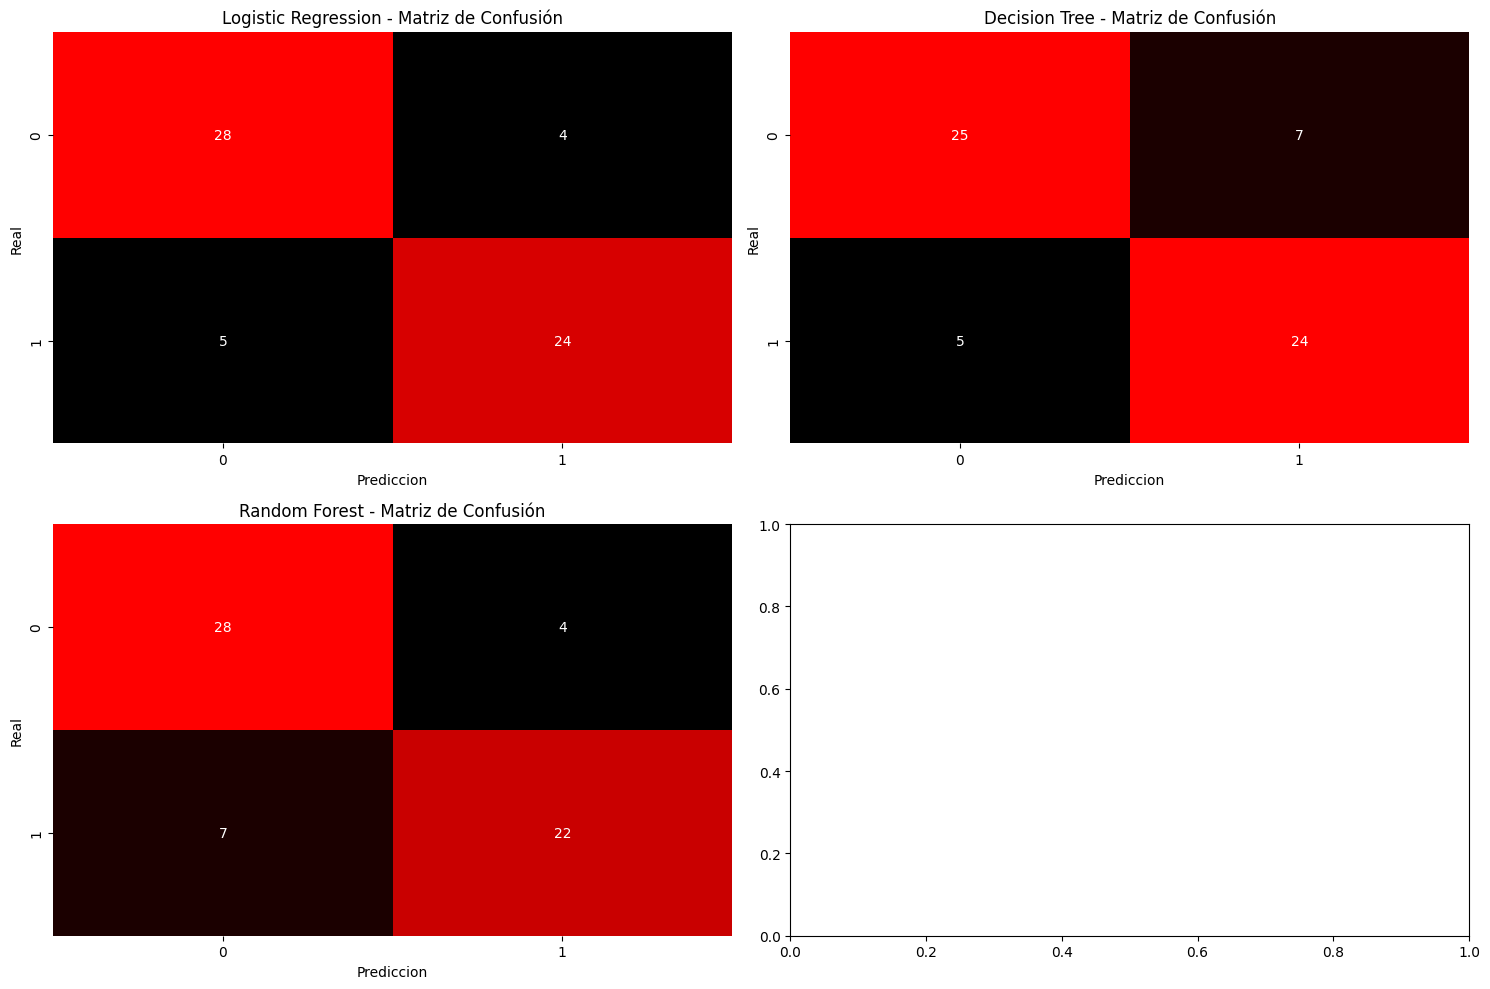

In [26]:
# Modelos y evaluación
from matplotlib.colors import LinearSegmentedColormap


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Calcular métricas mapeando cada modelo
metrics = dict(map(lambda item: (item[0], calculate_metrics(item[1], X_train, y_train, X_test, y_test)), models.items()))

# Imprimir resultados
for model_name, model_metrics in metrics.items():
    print(f"{model_name}:")
    print(f"  - Accuracy: {model_metrics['accuracy']:.4f}")
    print(f"  - F1: {model_metrics['f1']:.4f}")
    print(f"  - Precision: {model_metrics['precision']:.4f}")
    print(f"  - Recall: {model_metrics['recall']:.4f}")
    print(f"  - Matriz de Confusión:")
    print(model_metrics["confusion_matrix"])
    print()


# Función para graficar la matriz de confusión // funcion original deprecada de la lib
def plot_confusion_matrix(conf_matrix, model_name, ax):
    colors = [(0, 0, 0), (1, 0, 0)] 
    cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cm, cbar=False, ax=ax)
    ax.set_title(f"{model_name} - Matriz de Confusión")
    ax.set_xlabel("Prediccion")
    ax.set_ylabel("Real")

# Crear subplots dinámicamente
num_models = len(models)
num_rows = int(np.ceil(num_models / 2))
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.ravel()

# Iterar sobre los modelos y graficar las matrices de confusión
for i, (model_name, model_metrics) in enumerate(metrics.items()):
    conf_matrix = model_metrics["confusion_matrix"]
    plot_confusion_matrix(conf_matrix, model_name, axes[i])

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

### Relevancia de cada feature

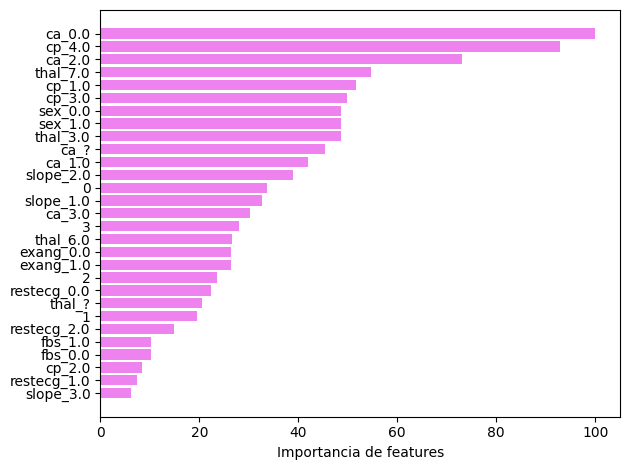

In [23]:
log_reg = LogisticRegression()
log_reg.fit(X_final, y_class)

feature_importance = abs(log_reg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], color='violet', align="center")
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_final.columns)[sorted_idx], fontsize=10)
featax.set_xlabel("Importancia de features")

plt.tight_layout()
plt.show()